In [4]:
## Initial imports
import pandas as pd
from pathlib import Path
import hvplot.pandas
import os
import seaborn as sns
import pygwalker as pyg
import numpy as np
import pandas_montecarlo

ModuleNotFoundError: No module named 'pandas_montecarlo'

## Data Import for Anaysis

Read csv files from different sources into  Dataframes and Clean Data

In [6]:
#Read the US Dollar Index Historical Data, Group into yearly data, rename columns and clean Data.
us_dollar_df = pd.read_csv('./Resources/US_Dollar_Index_Historical_Data_1971-2023.csv')
us_dollar_df['Date'] = pd.DatetimeIndex(us_dollar_df['Date']).year
us_dollar_df = us_dollar_df.rename(columns = {"Date":"Year","Price":"Dollar Price"})
us_dollar_df.head()

,Year,Dollar Price,Open,High,Low,Vol.,Change %
0,2023,103.16,104.15,104.50,101.92,NaN,-1.12%
1,2023,104.33,101.67,104.70,101.03,NaN,2.62%
2,2023,101.66,102.59,103.06,100.79,NaN,-0.83%
3,2023,102.51,105.04,105.88,101.92,NaN,-2.25%
4,2023,104.87,102.10,105.36,100.82,NaN,2.72%


In [7]:
us_dollar_df = us_dollar_df.groupby("Year").mean().round(2)
us_dollar_df.head()

/var/folders/wy/jrzdc8557zd6jyny6zcf8trc0000gn/T/ipykernel_55066/1289711987.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  us_dollar_df = us_dollar_df.groupby("Year").mean().round(2)


,Dollar Price,Open,High,Low,Vol.
Year,,,,,
1971,117.20,118.04,118.07,117.11,NaN
1972,109.08,109.16,109.45,108.77,NaN
1973,98.74,99.32,100.52,97.34,NaN
1974,100.93,101.58,102.72,99.89,NaN
1975,98.77,98.20,99.64,97.36,NaN


In [8]:
us_dollar_df = us_dollar_df[['Dollar Price']]
us_dollar_df.head()

,Dollar Price
Year,
1971,117.20
1972,109.08
1973,98.74
1974,100.93
1975,98.77


In [9]:
#Read the US Globalization Data, Set Year as index and clean Data.
us_globalization_df = pd.read_csv('./Resources/US_Globalization_1971-2021.csv')
us_globalization_df = us_globalization_df.set_index('Year').round(2)
us_globalization_df.head()

,Trade (% of GDP)
Year,
1971,10.76
1972,11.34
1973,13.08
1974,16.44
1975,15.52


In [10]:
#Read the US National Debt Data, Set Year as index and clean Data.
us_national_df = pd.read_csv('./Resources/US_National_Debt_by_the_Year_1971-2023.csv', encoding='unicode_escape')
us_national_df = us_national_df.set_index('Year')
us_national_df['DEBT'] = us_national_df['DEBT'].str.replace("$", "")
us_national_df['DEBT'] = us_national_df['DEBT'].str.replace(",", "")
us_national_df['DEBT'] = us_national_df['DEBT'].astype("float")
us_national_df = us_national_df[['DEBT']]
us_national_df.head()

/var/folders/wy/jrzdc8557zd6jyny6zcf8trc0000gn/T/ipykernel_55066/4107581143.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  us_national_df['DEBT'] = us_national_df['DEBT'].str.replace("$", "")


,DEBT
Year,
1971,398.0
1972,427.0
1973,458.0
1974,475.0
1975,533.0


In [11]:
#Read the US Oil Prices 1971 Data, Set Year as index and clean Data.
us_oil_71_df = pd.read_csv('./Resources/US_Oil_Prices_1971-2022.csv', encoding='unicode_escape')
us_oil_71_df = us_oil_71_df.set_index("Year").rename(columns = {"Average":"Avg Oil Prices"})
us_oil_71_df['Avg Oil Prices'] = us_oil_71_df['Avg Oil Prices'].str.replace("$", "")
us_oil_71_df['Avg Oil Prices'] = us_oil_71_df['Avg Oil Prices'].astype("float")
us_oil_71_df = us_oil_71_df[['Avg Oil Prices']]
us_oil_71_df.head()

/var/folders/wy/jrzdc8557zd6jyny6zcf8trc0000gn/T/ipykernel_55066/778236160.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  us_oil_71_df['Avg Oil Prices'] = us_oil_71_df['Avg Oil Prices'].str.replace("$", "")


,Avg Oil Prices
Year,
1971,3.17
1972,3.22
1973,4.08
1974,12.52
1975,13.95


In [12]:
#Read the US ResearchandDev Data, Rename column, Set Year as index and clean Data.
us_r_and_d_df = pd.read_csv('./Resources/US_ResearchandDev_1971-2023.csv')
us_r_and_d_df['Percentage of Fiscal Budget for R&D'] = us_r_and_d_df['Percentage of Fiscal Budget for R&D'].str.replace("%","")
us_r_and_d_df['Percentage of Fiscal Budget for R&D'] = pd.to_numeric(us_r_and_d_df['Percentage of Fiscal Budget for R&D'])
us_r_and_d_df= us_r_and_d_df.rename(columns = {"Fiscal Year":"Year"}).set_index("Year")
us_r_and_d_df= us_r_and_d_df[['Percentage of Fiscal Budget for R&D']]
us_r_and_d_df.head()

,Percentage of Fiscal Budget for R&D
Year,
1971,7.3
1972,7.1
1973,6.9
1974,6.5
1975,5.6


In [13]:
data_df =  pd.concat([us_dollar_df, us_national_df, us_oil_71_df, us_globalization_df, us_r_and_d_df], axis='columns', join='inner')
data_df.head()

,Dollar Price,DEBT,Avg Oil Prices,Trade (% of GDP),Percentage of Fiscal Budget for R&D
Year,,,,,
1971,117.20,398.0,3.17,10.76,7.3
1972,109.08,427.0,3.22,11.34,7.1
1973,98.74,458.0,4.08,13.08,6.9
1974,100.93,475.0,12.52,16.44,6.5
1975,98.77,533.0,13.95,15.52,5.6


## Performance Analysis - 1st Iteration

Conduct performance analysis to deduce the correlation between a single Variable (Oil Price) and its impact to the US dollar index

In [15]:
# Join the US Dollar index and the Oil Prices dataframe
combined_data_df = pd.concat(
    [us_dollar_df, us_oil_71_df], axis='columns', join='inner'
)
combined_data_df.head()

,Dollar Price,Avg Oil Prices
Year,,
1971,117.20,3.17
1972,109.08,3.22
1973,98.74,4.08
1974,100.93,12.52
1975,98.77,13.95


In [16]:
combined_data_df.hvplot(title= "Dollar Price Index Vs. Average Oil Price")

:NdOverlay   [Variable]
   :Curve   [Year]   (value)

In [17]:
# Calcuate the percentatge difference YOY for the US Dollar Index and Avg Oil Prices
diff_yoy_combined_data_df = combined_data_df.pct_change().dropna()
diff_yoy_combined_data_df.head()

,Dollar Price,Avg Oil Prices
Year,,
1972,-0.069283,0.015773
1973,-0.094793,0.267081
1974,0.022179,2.068627
1975,-0.021401,0.114217
1976,0.069758,-0.033692


<Axes: title={'center': 'Diff YoY between Oil Price and Dollar Index'}, xlabel='Year'>

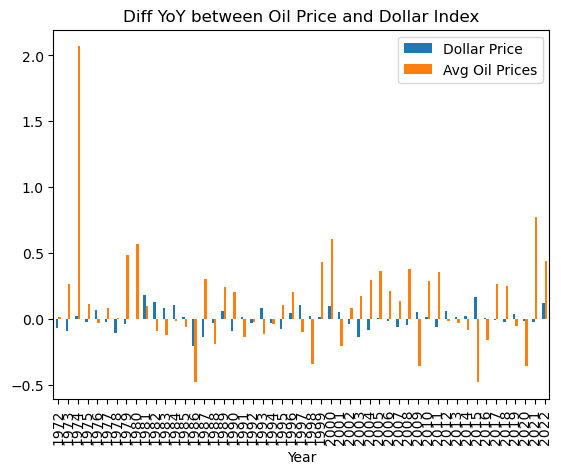

In [18]:
diff_yoy_combined_data_df.plot(kind="bar", title= "Diff YoY between Oil Price and Dollar Index")

In [19]:
# Calculate the correlation between US Index and Oil Price
corr_combined_data_df = diff_yoy_combined_data_df.corr()
corr_combined_data_df

,Dollar Price,Avg Oil Prices
Dollar Price,1.000000,-0.066692
Avg Oil Prices,-0.066692,1.000000


<Axes: >

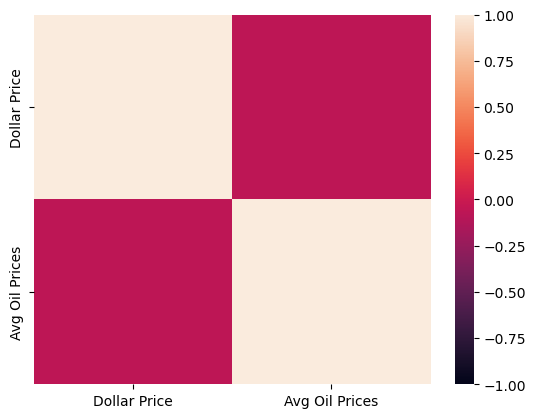

In [20]:
# Display the correlation matrix
sns.heatmap(corr_combined_data_df, vmin =-1, vmax = 1)

In [21]:
# percentage change of all factors
pct_change_data_df = data_df.pct_change()

<Axes: >

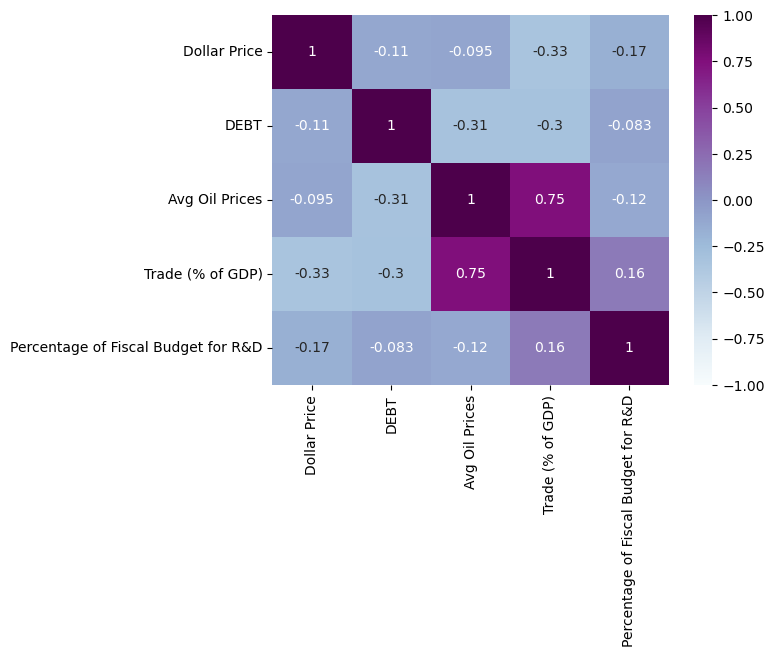

In [22]:
correlation = pct_change_data_df.corr()
sns.heatmap(correlation, vmin =-1, vmax = 1, annot = True, cmap="BuPu")

## Correlation Across Different Variables

In [115]:
# Display correlation matrix
correlation

,Dollar Price,DEBT,Avg Oil Prices,Trade (% of GDP),Percentage of Fiscal Budget for R&D
Dollar Price,1.000000,-0.113371,-0.095077,-0.328763,-0.166765
DEBT,-0.113371,1.000000,-0.314493,-0.304896,-0.082687
Avg Oil Prices,-0.095077,-0.314493,1.000000,0.754707,-0.119315
Trade (% of GDP),-0.328763,-0.304896,0.754707,1.000000,0.160875
Percentage of Fiscal Budget for R&D,-0.166765,-0.082687,-0.119315,0.160875,1.000000


In [119]:
# Running the configured chart to reproduce the chart of all factors with each placed next to the chart of USD index for comparison.
# Accomplished through config.json file created earlier by exporting the background codes after setting the chart as required once.
pyg.walk(data_df,spec = "config.json")

FileNotFoundError: Spec config file not found: config.json

In [120]:
# Creating the data frame with the data of correlation of all factors with US Dollar index
dollar_vs_factor_correlation_df = pd.DataFrame({'factors' : ['DEBT', 'Avg Oil Prices','Trade (% of GDP)','Percentage of Fiscal Budget for R&D'], 'correlation' : [-0.113371,-0.095077, -0.328763,-0.166765]})
dollar_vs_factor_correlation_df

,factors,correlation
0,DEBT,-0.113371
1,Avg Oil Prices,-0.095077
2,Trade (% of GDP),-0.328763
3,Percentage of Fiscal Budget for R&D,-0.166765


In [121]:
# Running the configured chart to reproduce the chart of correlation between USD Index and analyzed factors
# Accomplished through config_correlation.json file created earlier by exporting the background codes after setting the chart as required once.
pyg.walk(dollar_vs_factor_correlation_df, spec="config_correlation.json")

FileNotFoundError: Spec config file not found: config_correlation.json

## Yearly Monte Carlo to Reduce Noise in Monte Carlo Simulation

In [27]:
# % change in yearly USD
yearly_pct_change_usd = us_dollar_df['Dollar Price'].pct_change().fillna(0)
yearly_pct_change_usd

Year
1971    0.000000
1972   -0.069283
1973   -0.094793
1974    0.022179
1975   -0.021401
1976    0.069758
1977   -0.025175
1978   -0.110680
1979   -0.039847
1980   -0.001933
1981    0.182730
1982    0.125987
1983    0.078700
1984    0.104124
1985    0.012354
1986   -0.210500
1987   -0.137311
1988   -0.031875
1989    0.056380
1990   -0.095539
1991    0.011036
1992   -0.035197
1993    0.078273
1994   -0.028908
1995   -0.074862
1996    0.040400
1997    0.106529
1998    0.022360
1999    0.014581
2000    0.097006
2001    0.050855
2002   -0.042421
2003   -0.139951
2004   -0.085252
2005    0.006205
2006   -0.016788
2007   -0.065513
2008   -0.045121
2009    0.047774
2010    0.010809
2011   -0.064159
2012    0.055162
2013    0.013567
2014    0.019772
2015    0.164860
2016    0.005066
2017   -0.013475
2018   -0.022104
2019    0.038810
2020   -0.021041
2021   -0.027050
2022    0.121336
2023   -0.009225
Name: Dollar Price, dtype: float64

In [28]:
# The Monte Carlo simulation depicts a probability distribution of random outcomes of the USD valuation across the 1971-2023 period on top of the actual distribution of the % change of the USD
# x-axis = number of years during the period 1971-2023
# y-axis = %change movement of the USD
montecarlo2 = yearly_pct_change_usd.montecarlo(sims=30, bust=-1, goal=1)
montecarlo2.plot(title="USD Monte Carlo Simulation based on Yearly Data")

AttributeError: 'Series' object has no attribute 'montecarlo'

In [29]:
# summary statistics
print(montecarlo2.stats)

NameError: name 'montecarlo2' is not defined

## Monthly Monte Carlo Simulation

In [30]:
#Using the monthly data from the US dollar index data frame to get a more precise analysis
us_dollar_df = pd.read_csv('./Resources/US_Dollar_Index_Historical_Data_1971-2023.csv')
us_dollar_df['Date'] = pd.DatetimeIndex(us_dollar_df['Date'])
us_dollar_df = us_dollar_df.rename(columns = {"Price":"Dollar Price"})
us_dollar_df.head()

,Date,Dollar Price,Open,High,Low,Vol.,Change %
0,2023-06-01,103.16,104.15,104.50,101.92,NaN,-1.12%
1,2023-05-01,104.33,101.67,104.70,101.03,NaN,2.62%
2,2023-04-01,101.66,102.59,103.06,100.79,NaN,-0.83%
3,2023-03-01,102.51,105.04,105.88,101.92,NaN,-2.25%
4,2023-02-01,104.87,102.10,105.36,100.82,NaN,2.72%


In [31]:
monhtly_us = pd.read_csv('./Resources/US_Dollar_Index_Historical_Data_1971-2023.csv')
monhtly_us['Date'] = pd.DatetimeIndex(us_dollar_df['Date'])
monhtly_us

,Date,Price,Open,High,Low,Vol.,Change %
0,2023-06-01,103.16,104.15,104.50,101.92,NaN,-1.12%
1,2023-05-01,104.33,101.67,104.70,101.03,NaN,2.62%
2,2023-04-01,101.66,102.59,103.06,100.79,NaN,-0.83%
3,2023-03-01,102.51,105.04,105.88,101.92,NaN,-2.25%
4,2023-02-01,104.87,102.10,105.36,100.82,NaN,2.72%
...,...,...,...,...,...,...,...
624,1971-06-01,119.16,119.69,119.69,119.16,NaN,-0.23%
625,1971-05-01,119.43,120.17,120.17,118.91,NaN,-0.63%
626,1971-04-01,120.19,120.18,120.31,120.16,NaN,0.02%
627,1971-03-01,120.17,120.25,120.25,120.13,NaN,-0.07%


In [32]:
# monthly % change USD
pct_change_usd = monhtly_us['Price'].pct_change().fillna(0)
pct_change_usd

0      0.000000
1      0.011342
2     -0.025592
3      0.008361
4      0.023022
         ...   
624    0.003368
625    0.002266
626    0.006364
627   -0.000166
628    0.000749
Name: Price, Length: 629, dtype: float64

In [33]:
# x-axis = number of months during the period 1971-2023
#y-axis = %change movement of the USD
montecarlo = pct_change_usd.montecarlo(sims=30, bust=-1, goal=1)
montecarlo.plot(title="USD Monte Carlo Simulation based on Monthly Data")

AttributeError: 'Series' object has no attribute 'montecarlo'

In [34]:
# summary statistics
print(montecarlo.stats)



NameError: name 'montecarlo' is not defined

In [35]:
print(montecarlo.maxdd)

NameError: name 'montecarlo' is not defined

Analysis
* 2 trends are depicted on the Monte Carlo:
1. Long-Term Trend: Increasing Value of the USD over the 50y period.
Looking at the Monthly Monte Carlo, overall, over the last 50 years, the USD has been increasing in value
2. Short-Term Cyclical Trend: 15 years cycles of expansion, peak, and contraction.
This trend is apparent in the yearly Monte Carlo (1st cycle: y10-y25, 2nd cycle: y25-y40, 3rd cycle: y40-..?)
Conclusion/Prediction: Currently, we are about 10 years into the USD cycle and reaching a peak. As a result, based on the observed pattern, we can expect the USD to enter into a contraction phase.¶Meaning we expect the USD to decrease in value, which confirms our hypothesis.

## Probability Distribution of the USD

<Axes: >

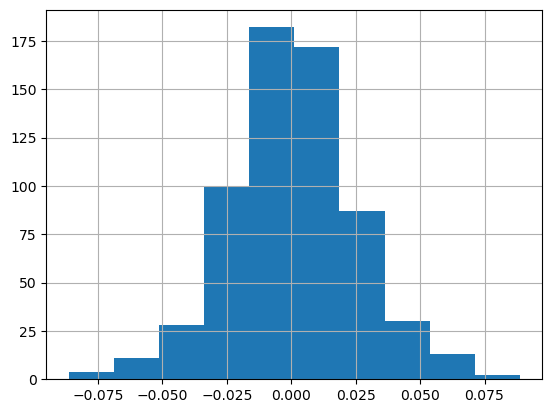

In [36]:
pct_change_usd.hist()

 ## Portfolio Analysis

In [37]:
# import GLD csv
gold_df = pd.read_csv('./Resources/GLD.csv', index_col = "Date", parse_dates = True, infer_datetime_format = True)
gold_df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-07-10,118.889999,119.000000,118.610001,118.930000,118.930000,3754800
2018-07-11,118.449997,118.529999,117.620003,117.639999,117.639999,6974500
2018-07-12,118.000000,118.260002,117.940002,118.129997,118.129997,4585300
2018-07-13,117.620003,117.750000,117.449997,117.610001,117.610001,5444300
2018-07-16,117.510002,117.629997,117.279999,117.550003,117.550003,3670700
...,...,...,...,...,...,...
2023-06-30,177.690002,178.529999,177.320007,178.270004,178.270004,6420600
2023-07-03,178.610001,179.339996,178.460007,178.470001,178.470001,4085700
2023-07-05,179.410004,179.419998,177.830002,177.839996,177.839996,5650600


In [38]:
#Clean Gold Data
gold_df = gold_df.drop('Open', axis='columns')
gold_df = gold_df.drop('High', axis='columns')
gold_df = gold_df.drop('Low', axis='columns')
gold_df = gold_df.drop('Adj Close', axis='columns')
gold_df = gold_df.drop('Volume', axis='columns')
gold_df.rename(columns = {"Close" : "Gold Close"}, inplace = True)
gold_df

,Gold Close
Date,
2018-07-10,118.930000
2018-07-11,117.639999
2018-07-12,118.129997
2018-07-13,117.610001
2018-07-16,117.550003
...,...
2023-06-30,178.270004
2023-07-03,178.470001
2023-07-05,177.839996


In [40]:
# import CVGI csv
cvgi_df = pd.read_csv('./Resources/CVGI.csv', index_col = "Date", parse_dates = True, infer_datetime_format = True)
cvgi_df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-07-10,7.74,7.81,7.44,7.59,7.59,127900
2018-07-11,7.54,7.56,7.28,7.29,7.29,193100
2018-07-12,7.36,7.36,7.04,7.16,7.16,135300
2018-07-13,7.16,7.36,7.16,7.18,7.18,88200
2018-07-16,7.16,7.18,6.96,7.14,7.14,121700
...,...,...,...,...,...,...
2023-06-30,10.99,11.45,10.98,11.10,11.10,706100
2023-07-03,11.10,11.27,10.94,11.18,11.18,264900
2023-07-05,11.15,11.15,10.37,10.63,10.63,400800


In [41]:
#Clean CVIG Data
cvgi_df = cvgi_df.drop('Open', axis='columns')
cvgi_df = cvgi_df.drop('High', axis='columns')
cvgi_df = cvgi_df.drop('Low', axis='columns')
cvgi_df = cvgi_df.drop('Adj Close', axis='columns')
cvgi_df = cvgi_df.drop('Volume', axis='columns')
cvgi_df.rename(columns = {"Close" : "CVGI Close"}, inplace = True)
cvgi_df

,CVGI Close
Date,
2018-07-10,7.59
2018-07-11,7.29
2018-07-12,7.16
2018-07-13,7.18
2018-07-16,7.14
...,...
2023-06-30,11.10
2023-07-03,11.18
2023-07-05,10.63


In [44]:
# import CVRX csv
cvrx_df = pd.read_csv('./Resources/CVRX.csv',index_col = "Date", parse_dates = True, infer_datetime_format = True)
cvrx_df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-06-30,26.250000,29.000000,25.000000,28.000000,28.000000,2856100
2021-07-01,27.049999,27.620001,24.530001,26.070000,26.070000,552900
2021-07-02,26.160000,26.285000,24.150000,25.459999,25.459999,195100
2021-07-06,25.129999,27.420000,22.000000,22.170000,22.170000,387700
2021-07-07,23.000000,24.790001,20.010000,20.040001,20.040001,120100
...,...,...,...,...,...,...
2023-06-30,14.540000,15.630000,14.319000,15.440000,15.440000,344300
2023-07-03,15.400000,15.930000,15.130000,15.400000,15.400000,60800
2023-07-05,15.330000,15.450000,14.800000,14.860000,14.860000,90800


In [45]:
#Clean CVRX Data
cvrx_df = cvrx_df.drop('Open', axis='columns')
cvrx_df = cvrx_df.drop('High', axis='columns')
cvrx_df = cvrx_df.drop('Low', axis='columns')
cvrx_df = cvrx_df.drop('Adj Close', axis='columns')
cvrx_df = cvrx_df.drop('Volume', axis='columns')
cvrx_df.rename(columns = {"Close" : "CVRX Close"}, inplace = True)
cvrx_df

,CVRX Close
Date,
2021-06-30,28.000000
2021-07-01,26.070000
2021-07-02,25.459999
2021-07-06,22.170000
2021-07-07,20.040001
...,...
2023-06-30,15.440000
2023-07-03,15.400000
2023-07-05,14.860000


In [47]:
# import LIDR csv
lidr_df = pd.read_csv('./Resources/LIDR.csv', index_col = "Date", parse_dates = True, infer_datetime_format = True)
lidr_df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-01-11,11.000,11.000,10.650,10.680,10.680,3400
2021-01-12,10.700,10.890,10.700,10.750,10.750,183300
2021-01-13,11.610,11.610,10.540,10.750,10.750,8800
2021-01-14,10.940,14.490,10.650,13.290,13.290,5311900
2021-01-15,12.770,13.300,12.390,12.770,12.770,1379800
...,...,...,...,...,...,...
2023-06-30,0.187,0.197,0.180,0.180,0.180,711300
2023-07-03,0.190,0.199,0.189,0.198,0.198,588900
2023-07-05,0.184,0.198,0.174,0.192,0.192,1032600


In [48]:
#Clean LIDR Data
lidr_df = lidr_df.drop('Open', axis='columns')
lidr_df = lidr_df.drop('High', axis='columns')
lidr_df = lidr_df.drop('Low', axis='columns')
lidr_df = lidr_df.drop('Adj Close', axis='columns')
lidr_df = lidr_df.drop('Volume', axis='columns')
lidr_df.rename(columns = {"Close" : "LIDR Close"}, inplace = True)
lidr_df

,LIDR Close
Date,
2021-01-11,10.680
2021-01-12,10.750
2021-01-13,10.750
2021-01-14,13.290
2021-01-15,12.770
...,...
2023-06-30,0.180
2023-07-03,0.198
2023-07-05,0.192


In [50]:
# import APEN csv
apen_df = pd.read_csv('./Resources/APENX.csv', index_col = "Date", parse_dates = True, infer_datetime_format = True)
apen_df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-07-10,10.11,10.11,10.11,10.11,8.701311,0
2018-07-11,10.12,10.12,10.12,10.12,8.709917,0
2018-07-12,10.12,10.12,10.12,10.12,8.709917,0
2018-07-13,10.12,10.12,10.12,10.12,8.709917,0
2018-07-16,10.11,10.11,10.11,10.11,8.701311,0
...,...,...,...,...,...,...
2023-06-30,8.71,8.71,8.71,8.71,8.710000,0
2023-07-03,8.71,8.71,8.71,8.71,8.710000,0
2023-07-05,8.68,8.68,8.68,8.68,8.680000,0


In [51]:
#Clean APEN Data
apen_df = apen_df.drop('Open', axis='columns')
apen_df = apen_df.drop('High', axis='columns')
apen_df = apen_df.drop('Low', axis='columns')
apen_df = apen_df.drop('Adj Close', axis='columns')
apen_df = apen_df.drop('Volume', axis='columns')
apen_df.rename(columns = {"Close" : "APEN Close"}, inplace = True)
apen_df

,APEN Close
Date,
2018-07-10,10.11
2018-07-11,10.12
2018-07-12,10.12
2018-07-13,10.12
2018-07-16,10.11
...,...
2023-06-30,8.71
2023-07-03,8.71
2023-07-05,8.68


In [53]:
# import STIM csv 
stim_df = pd.read_csv('./Resources/STIM.csv', index_col = "Date", parse_dates = True, infer_datetime_format = True)
stim_df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-07-10,26.980000,26.980000,25.120001,26.120001,26.120001,218500
2018-07-11,26.000000,26.320000,25.309999,26.139999,26.139999,81200
2018-07-12,25.615000,26.450001,25.555000,25.770000,25.770000,31400
2018-07-13,26.190001,26.190001,24.860001,24.990000,24.990000,29800
2018-07-16,25.000000,27.450001,25.000000,27.290001,27.290001,115600
...,...,...,...,...,...,...
2023-06-30,2.160000,2.220000,2.105000,2.150000,2.150000,116800
2023-07-03,2.150000,2.220000,2.150000,2.220000,2.220000,38500
2023-07-05,2.240000,2.270000,2.130000,2.210000,2.210000,71500


In [54]:
#Clean STIM Data
stim_df = stim_df.drop('Open', axis='columns')
stim_df = stim_df.drop('High', axis='columns')
stim_df = stim_df.drop('Low', axis='columns')
stim_df = stim_df.drop('Adj Close', axis='columns')
stim_df = stim_df.drop('Volume', axis='columns')
stim_df.rename(columns = {"Close" : "STIM Close"}, inplace = True)
stim_df

,STIM Close
Date,
2018-07-10,26.120001
2018-07-11,26.139999
2018-07-12,25.770000
2018-07-13,24.990000
2018-07-16,27.290001
...,...
2023-06-30,2.150000
2023-07-03,2.220000
2023-07-05,2.210000


In [56]:
# import TM csv
tm_df = pd.read_csv('./Resources/TM.csv', index_col = "Date", parse_dates = True, infer_datetime_format = True)
tm_df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-07-10,129.179993,129.440002,129.009995,129.270004,129.270004,120100
2018-07-11,128.679993,128.740005,127.779999,128.059998,128.059998,75300
2018-07-12,129.059998,129.350006,128.820007,129.179993,129.179993,79700
2018-07-13,129.119995,129.669998,129.080002,129.509995,129.509995,74900
2018-07-16,129.710007,129.710007,129.399994,129.509995,129.509995,100500
...,...,...,...,...,...,...
2023-06-30,160.139999,161.210007,160.000000,160.750000,160.750000,311100
2023-07-03,160.880005,161.570007,160.419998,160.470001,160.470001,110200
2023-07-05,162.309998,162.309998,161.350006,161.899994,161.899994,357400


In [57]:
#Clean TM Data
tm_df = tm_df.drop('Open', axis='columns')
tm_df = tm_df.drop('High', axis='columns')
tm_df = tm_df.drop('Low', axis='columns')
tm_df = tm_df.drop('Adj Close', axis='columns')
tm_df = tm_df.drop('Volume', axis='columns')
tm_df.rename(columns = {"Close" : "TM Close"}, inplace = True)
tm_df

,TM Close
Date,
2018-07-10,129.270004
2018-07-11,128.059998
2018-07-12,129.179993
2018-07-13,129.509995
2018-07-16,129.509995
...,...
2023-06-30,160.750000
2023-07-03,160.470001
2023-07-05,161.899994


In [103]:
# import ZYXI csv
zyxi_df = pd.read_csv('./Resources/ZYXI.csv', index_col = "Date", parse_dates = True, infer_datetime_format = True)
zyxi_df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-07-10,2.636364,2.745455,2.636364,2.736364,2.634866,27280
2018-07-11,2.709091,2.727273,2.636364,2.727273,2.626112,3960
2018-07-12,2.681818,2.736364,2.681818,2.727273,2.626112,4950
2018-07-13,2.681818,2.736364,2.681818,2.736364,2.634866,12760
2018-07-16,2.727273,2.736364,2.718182,2.718182,2.617358,2090
...,...,...,...,...,...,...
2023-06-30,9.760000,9.990000,9.570000,9.590000,9.590000,196000
2023-07-03,9.510000,9.700000,9.230000,9.440000,9.440000,195900
2023-07-05,9.500000,9.540000,9.150000,9.170000,9.170000,215500


In [104]:
#Clean ZYXI Data
zyxi_df = zyxi_df.drop('Open', axis='columns')
zyxi_df = zyxi_df.drop('High', axis='columns')
zyxi_df = zyxi_df.drop('Low', axis='columns')
zyxi_df = zyxi_df.drop('Adj Close', axis='columns')
zyxi_df = zyxi_df.drop('Volume', axis='columns')
zyxi_df.rename(columns = {"Close" : "ZYXI Close"}, inplace = True)
zyxi_df

,ZYXI Close
Date,
2018-07-10,2.736364
2018-07-11,2.727273
2018-07-12,2.727273
2018-07-13,2.736364
2018-07-16,2.718182
...,...
2023-06-30,9.590000
2023-07-03,9.440000
2023-07-05,9.170000


## Daily Close Combined

In [106]:
daily_close = pd.concat([cvgi_df, cvrx_df, gold_df, lidr_df, apen_df, stim_df, tm_df, zyxi_df], axis = 1, join = "inner")
daily_close

,CVGI Close,CVRX Close,Gold Close,LIDR Close,APEN Close,STIM Close,TM Close,ZYXI Close
Date,,,,,,,,
2021-06-30,10.63,28.000000,165.630005,10.030,10.43,16.02,174.839996,14.118182
2021-07-01,10.31,26.070000,166.199997,10.020,10.43,15.54,175.479996,15.172727
2021-07-02,9.75,25.459999,167.289993,10.020,10.44,14.67,176.029999,14.936364
2021-07-06,9.23,22.170000,168.119995,10.020,10.46,14.46,174.929993,14.354545
2021-07-07,9.51,20.040001,168.759995,10.010,10.47,14.03,175.649994,13.809091
...,...,...,...,...,...,...,...,...
2023-06-30,11.10,15.440000,178.270004,0.180,8.71,2.15,160.750000,9.590000
2023-07-03,11.18,15.400000,178.470001,0.198,8.71,2.22,160.470001,9.440000
2023-07-05,10.63,14.860000,177.839996,0.192,8.68,2.21,161.899994,9.170000


<Axes: title={'center': 'Daily Close Prices of Portfolios'}, xlabel='Date'>

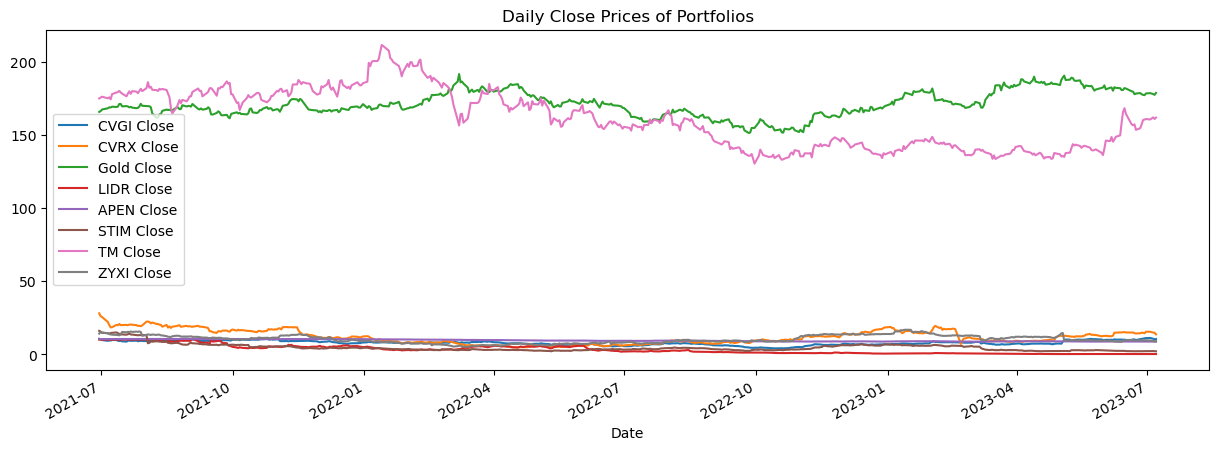

In [107]:
daily_close.plot(figsize=(15,5), title ='Daily Close Prices of Portfolios')

In [108]:
daily_return = daily_close.pct_change()
daily_return = daily_return.dropna()
daily_return

,CVGI Close,CVRX Close,Gold Close,LIDR Close,APEN Close,STIM Close,TM Close,ZYXI Close
Date,,,,,,,,
2021-07-01,-0.030103,-0.068929,0.003441,-0.000997,0.000000,-0.029963,0.003660,0.074694
2021-07-02,-0.054316,-0.023399,0.006558,0.000000,0.000959,-0.055985,0.003134,-0.015578
2021-07-06,-0.053333,-0.129222,0.004961,0.000000,0.001916,-0.014315,-0.006249,-0.038953
2021-07-07,0.030336,-0.096076,0.003807,-0.000998,0.000956,-0.029737,0.004116,-0.037999
2021-07-08,-0.009464,-0.082335,-0.000652,0.000000,0.000955,0.038489,-0.008084,-0.015800
...,...,...,...,...,...,...,...,...
2023-06-30,0.017415,0.071478,0.006663,-0.062500,0.001149,-0.004630,0.002182,-0.005187
2023-07-03,0.007207,-0.002591,0.001122,0.100000,0.000000,0.032558,-0.001742,-0.015641
2023-07-05,-0.049195,-0.035065,-0.003530,-0.030303,-0.003444,-0.004505,0.008911,-0.028602


In [66]:
# import S&P 500
sp500_df = pd.read_csv('./Resources/^SPX.csv', index_col = "Date", parse_dates = True, infer_datetime_format = True)

In [93]:
# Calculating return on the index
sp500_return = sp500_df["Close"].pct_change()
sp500_return = sp500_return.dropna()
sp500_return

Date
2018-07-11   -0.007094
2018-07-12    0.008749
2018-07-13    0.001079
2018-07-16   -0.001028
2018-07-17    0.003974
                ...   
2023-06-30    0.012269
2023-07-03    0.001171
2023-07-05   -0.001968
2023-07-06   -0.007923
2023-07-07   -0.002865
Name: Close, Length: 1256, dtype: float64

## Portfolio Optimization: Max Sharpe-Ratio

In [68]:
## Calculate the weighted returns for the portfolio, to max the Sharpe ratio we're only using Zynex, Apollo Endosurgery, and Gold
## This investment decision was determined thanks to a portfolio optimization tool (see ReadMe)

In [109]:
# Set weights: to optimize the portfolio as to maximize the sharpe ratio we only invest in  Zynex, Apollo Endosurgery, and Gold
weights = [0, 0, 0.5489, 0, 0.0219, 0, 0, 0.4291]
# Calculate portfolio return
portfolio_return = daily_return.dot(weights)
# Display sample data
portfolio_return

Date
2021-07-01    0.033940
2021-07-02   -0.003064
2021-07-06   -0.013950
2021-07-07   -0.014195
2021-07-08   -0.007117
                ...   
2023-06-30    0.001457
2023-07-03   -0.006096
2023-07-05   -0.014286
2023-07-06   -0.009249
2023-07-07    0.003641
Length: 507, dtype: float64

<Axes: title={'center': 'Portfolio Returns'}, xlabel='Date'>

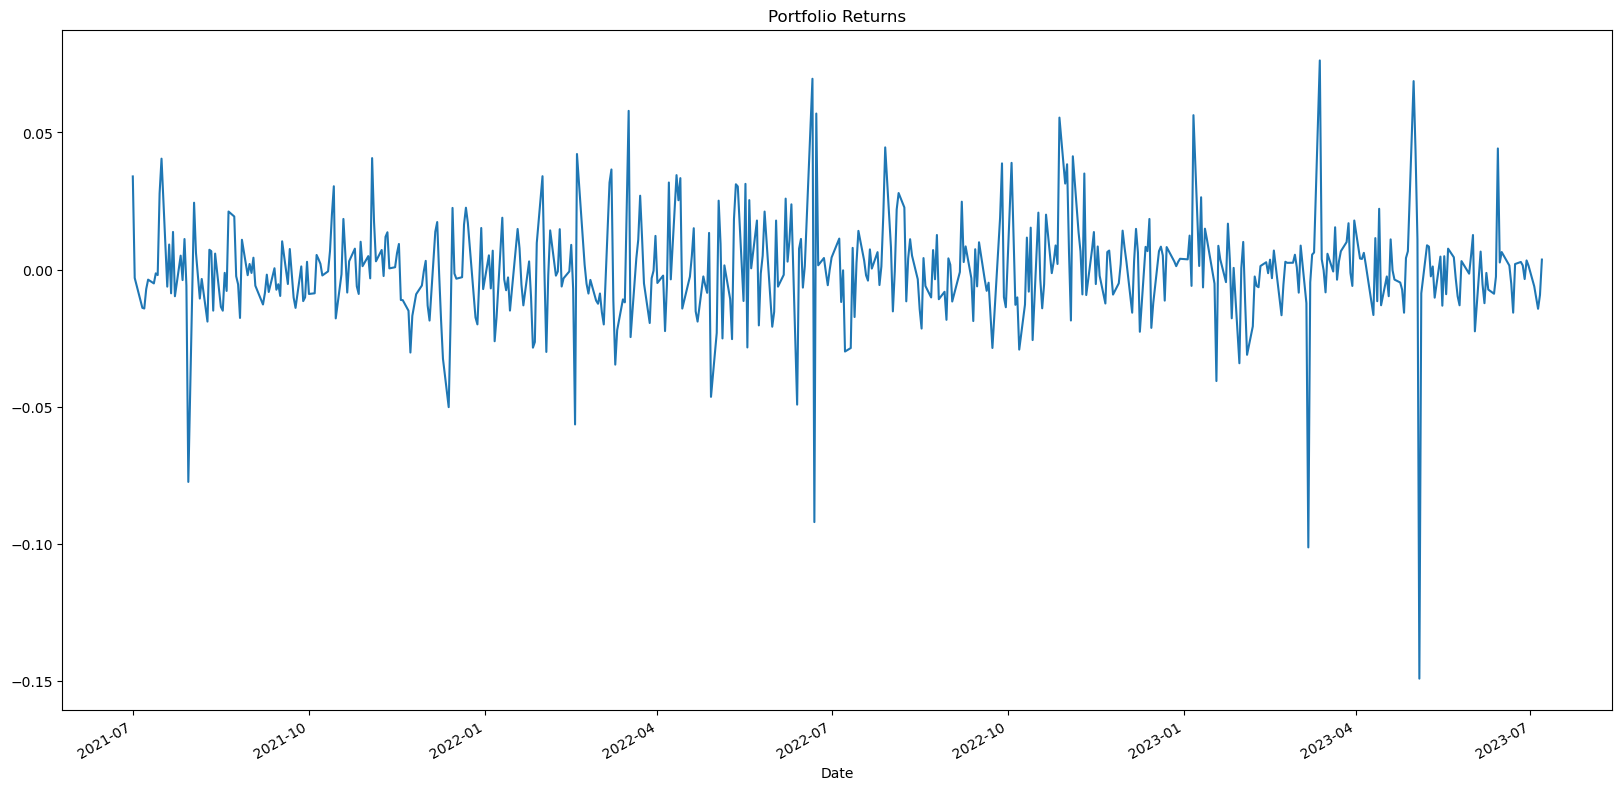

In [111]:
# Plot portfolio return
portfolio_return.plot(figsize=(20, 10), title="Portfolio Returns")

In [71]:
# Calculate Annualized Sharpe Ratios

In [112]:
# sharpe ratios calculated without risk-free data
sharpe_ratio = (portfolio_return.mean() * 252) / (portfolio_return.std() * np.sqrt(252))
sharpe_ratio

0.09978249922308091

In [98]:
# A Sharpe ratio of 0.1 indicates that the investment is generating 0.1 units of excess return for each unit of risk taken, relative to the risk-free rate.

In [113]:
# Calculate cumulative returns of the portfolio over the past 7 months
cummulative_portfolio_return = (1 + portfolio_return).cumprod()-1
cummulative_portfolio_return.head(400)

Date
2021-07-01    0.033940
2021-07-02    0.030773
2021-07-06    0.016394
2021-07-07    0.001966
2021-07-08   -0.005164
                ...   
2023-01-26    0.167524
2023-01-27    0.168240
2023-01-30    0.128356
2023-01-31    0.128929
2023-02-01    0.140301
Length: 400, dtype: float64

<Axes: title={'center': 'Cummulative Returns Portfolio'}, xlabel='Date'>

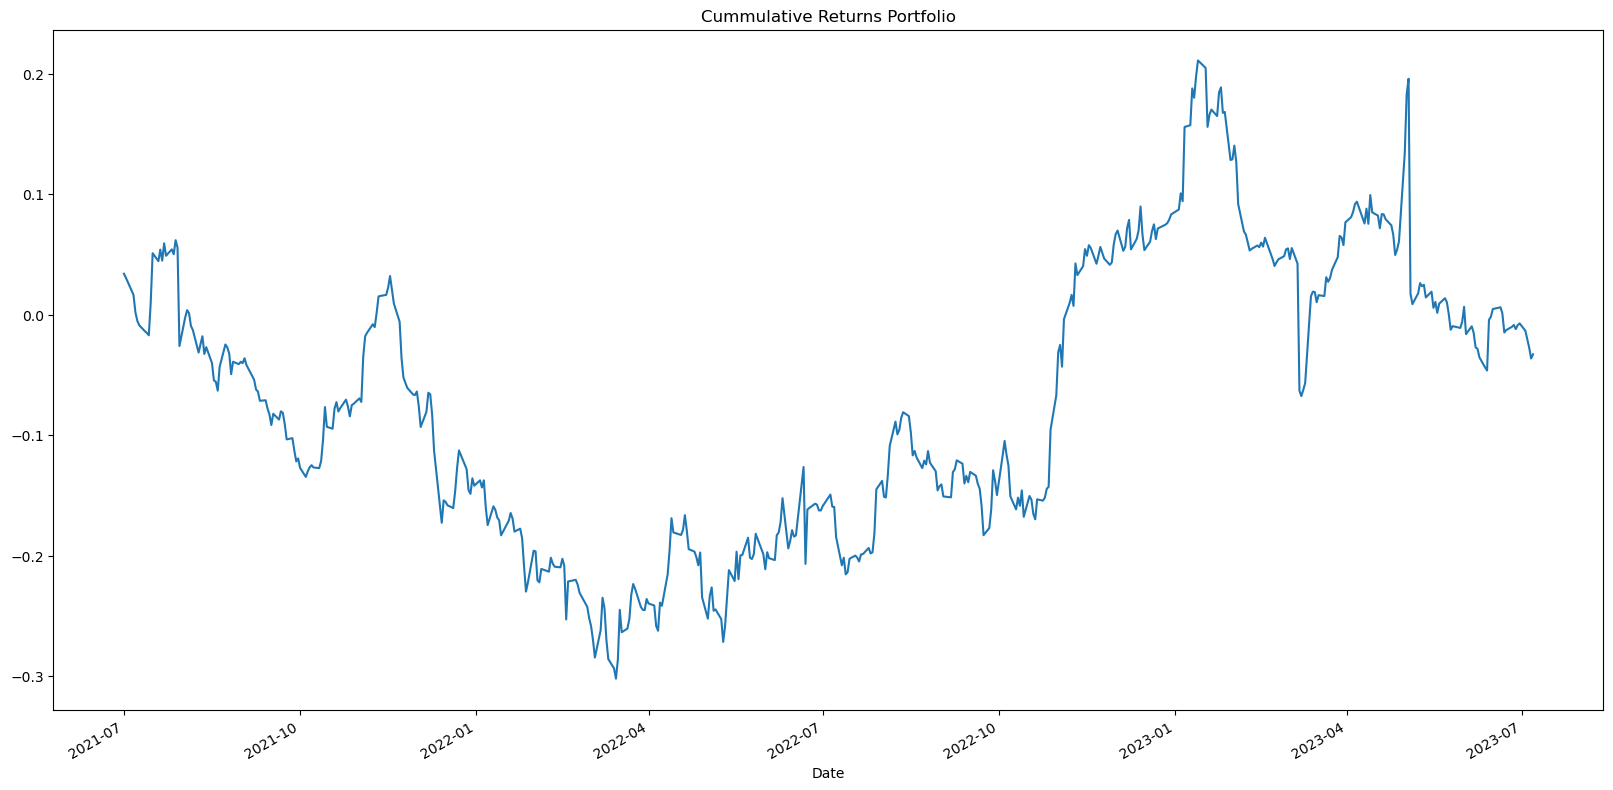

In [114]:
cummulative_portfolio_return.plot(figsize=(20, 10), title="Cummulative Returns Portfolio")